In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            # print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            # print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)
    


In [15]:
df = read_and_preprocess("co2emissions.csv", [], ["2004", "2009", "2013","2014"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906
5,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.645736,0.687465,0.763574,0.878238,1.003053,1.170540,...,4.185677,4.285719,4.117148,4.408948,4.562015,4.636813,4.559462,4.837780,4.674925,4.886988
6,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.119035,0.109141,0.163533,0.175833,0.132825,0.146820,...,25.314486,23.371860,21.985933,22.195490,21.214060,18.808520,18.491617,19.294920,18.559236,22.939606
7,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.383343,2.458551,2.538446,2.330685,2.553442,2.656466,...,4.168129,4.465186,4.414246,4.718224,4.445388,4.607164,4.644373,4.609180,4.498540,4.781508
8,Armenia,ARM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.460026,1.481275,1.726828,1.911933,1.509669,1.465618,1.709502,1.974479,1.897040,1.898719
10,Antigua and Barbuda,ATG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.677431,0.866730,1.838721,1.487443,1.590448,2.561365,...,5.266544,5.365000,5.586080,5.625221,5.875925,5.956980,5.751964,5.800097,5.729938,5.744420


In [6]:
print(find_country_to_minimize_column(df, "2014"))
print(find_country_to_maximize_column(df, "2014"))

14    Burundi
Name: Country Name, dtype: object
198    Qatar
Name: Country Name, dtype: object


2


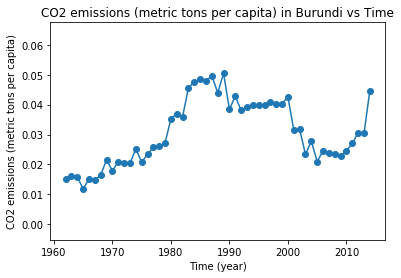

In [8]:
plot_country_data(df, "Burundi", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Burundi vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2Burundi.png")  


0


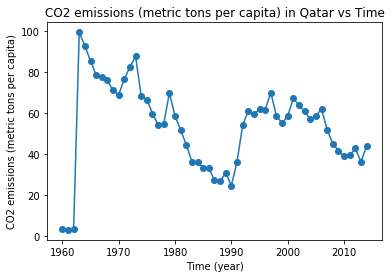

In [9]:
plot_country_data(df, "Qatar", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Qatar vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2Qatar.png")  


0


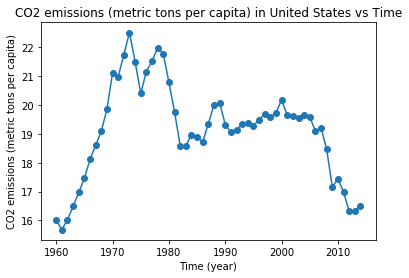

In [10]:
plot_country_data(df, "United States", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in United States vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2US.png")  


0


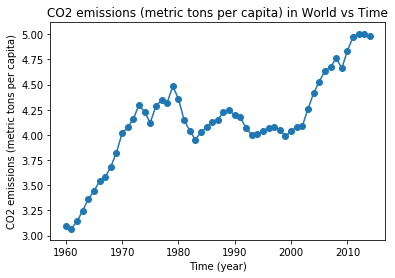

In [11]:
plot_country_data(df, "World", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in World vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2World.png")  


In [18]:
print(find_fastest_growing_region(df, "2004", "2014"))
print(find_fastest_growing_region(df, "2009", "2014"))
print(find_fastest_growing_region(df, "2013", "2014"))

(0.8323607184345946, 'Brunei Darussalam')
(0.7868997978872555, 'Estonia')
(7.469390427922883, 'Qatar')


In [19]:
print(find_fastest_declining_region(df, "2004", "2014"))
print(find_fastest_declining_region(df, "2009", "2014"))
print(find_fastest_declining_region(df, "2013", "2014"))

(-1.8107229237916456, 'Aruba')
(-3.5010515772083495, 'Aruba')
(-6.359459775524657, 'Mongolia')


0


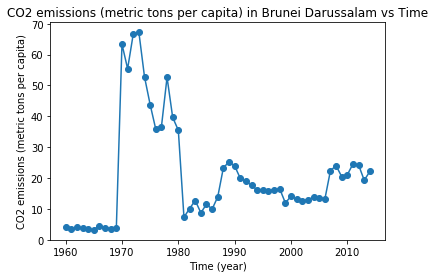

In [20]:
plot_country_data(df, "Brunei Darussalam", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Brunei Darussalam vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2BD.png")  


32


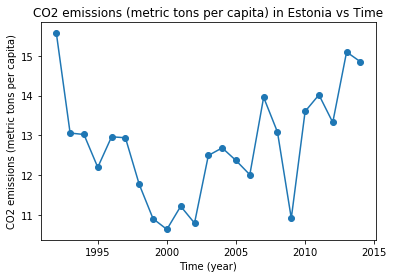

In [21]:
plot_country_data(df, "Estonia", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Estonia vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2Estonia.png")  


26


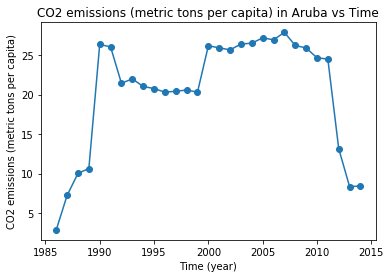

In [22]:
plot_country_data(df, "Aruba", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Aruba vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2Aruba.png")  


0


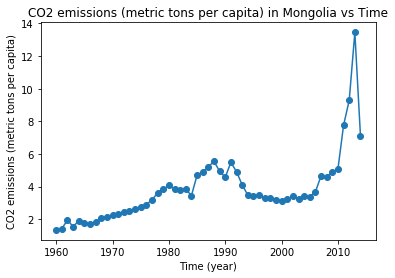

In [23]:
plot_country_data(df, "Mongolia", False, True, 1960, 2014, [], "CO2 emissions (metric tons per capita) in Mongolia vs Time", "Time (year)", "CO2 emissions (metric tons per capita)", "CO2Mongolia.png")  
